# Testing the Stationarity of a Signal

In [1]:
from signalsnap import SpectrumCalculator, SpectrumConfig, PlotConfig
import numpy as np

From a mathematical point of view, a signal must be stationary in order to calculate a spectrum from it. This means that each windows follows the same statistical properties. Here, we show one way to test if a signal is stationary. We are generating a counterexample, where the frequency of an oscillation is increasing over time.

In [2]:
# ------- creat complex noise --------
t_array = np.arange(0, 1e6, 1) # in s
dt = t_array[1] - t_array[0]
f_max = 1 / dt / 2
print('f_Nyquist =', f_max, 'Hz')

white_noise_real = np.random.normal(size=len(t_array))
white_noise_imag = 1j * np.random.normal(size=len(t_array))

noise = white_noise_real + white_noise_imag

# ------- filter noise ---------
def dydt(y, t, omega_0, gamma, noise):
    return + 1j * omega_0[int(t)] * y - gamma * y + noise[int(t)] / 10

y0 = 0
omega_0 = 2 * np.pi * np.linspace(0.001, 0.004, len(t_array))
gamma = 0.001

# ------- integrate with euler method --------
y = 1j * np.empty_like(t_array)
y[0] = y0
for i in range(1, len(t_array)):
    y[i] = y[i-1] + dt * dydt(y[i-1], t_array[i-1], omega_0, gamma, noise)

f_Nyquist = 0.5 Hz


T_window: 5.000e+03 s
Maximum frequency: 5.000e-01 Hz


  0%|          | 0/10 [00:00<?, ?it/s]

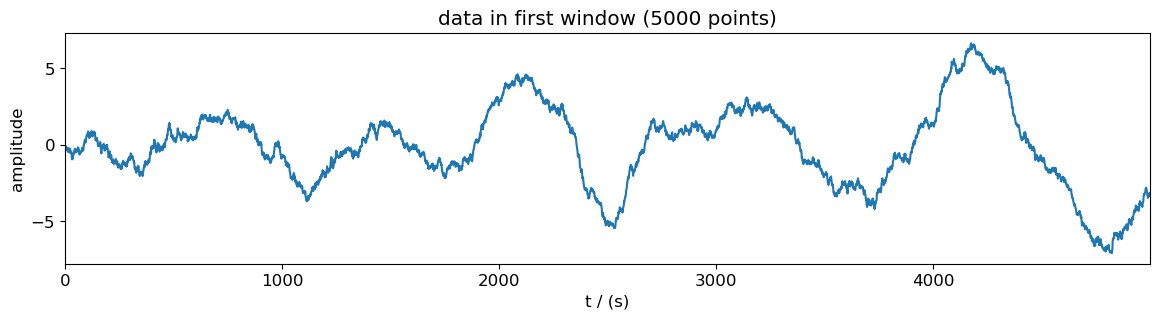

In [5]:
config = SpectrumConfig(data=np.real(y), delta_t=dt, f_unit='Hz', 
                        spectrum_size=51, order_in='all', 
                        f_max=0.01, backend='cpu', m_stationarity=1)

spec = SpectrumCalculator(config)

f, s, serr = spec.calc_spec()

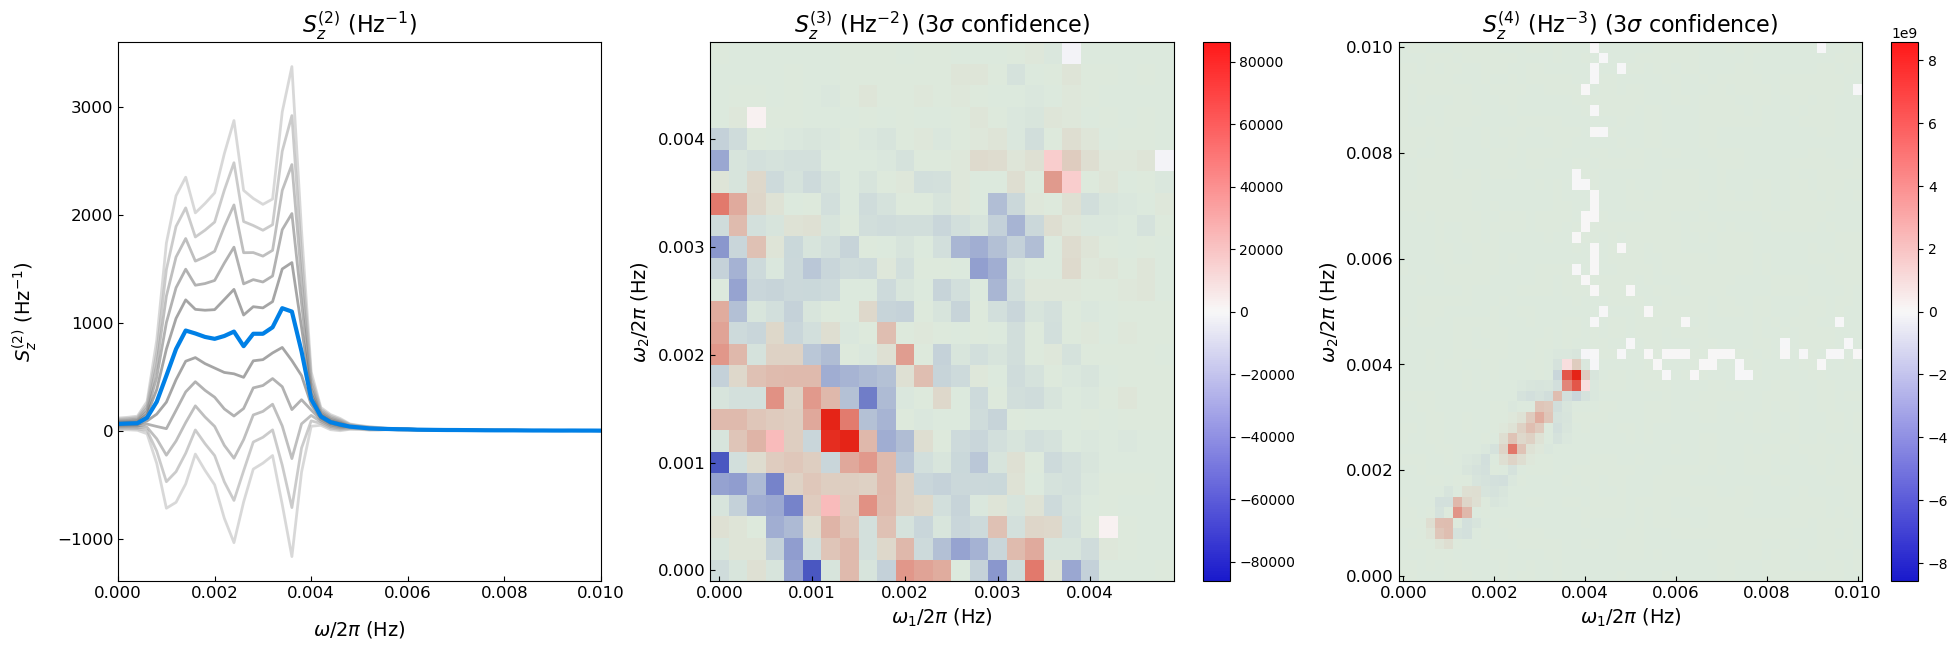

In [6]:
plot_config = PlotConfig(green_alpha=0.1, sigma=3)
fig = spec.plot(plot_config)

The power spectrum shows a smeared out peak due to the averaging over all frames. However, the drifting frequency can be visualized by plotting power spectrum from `m_stationarity` frames against time.

One spectrum calculated from a 50000.0 s measurement


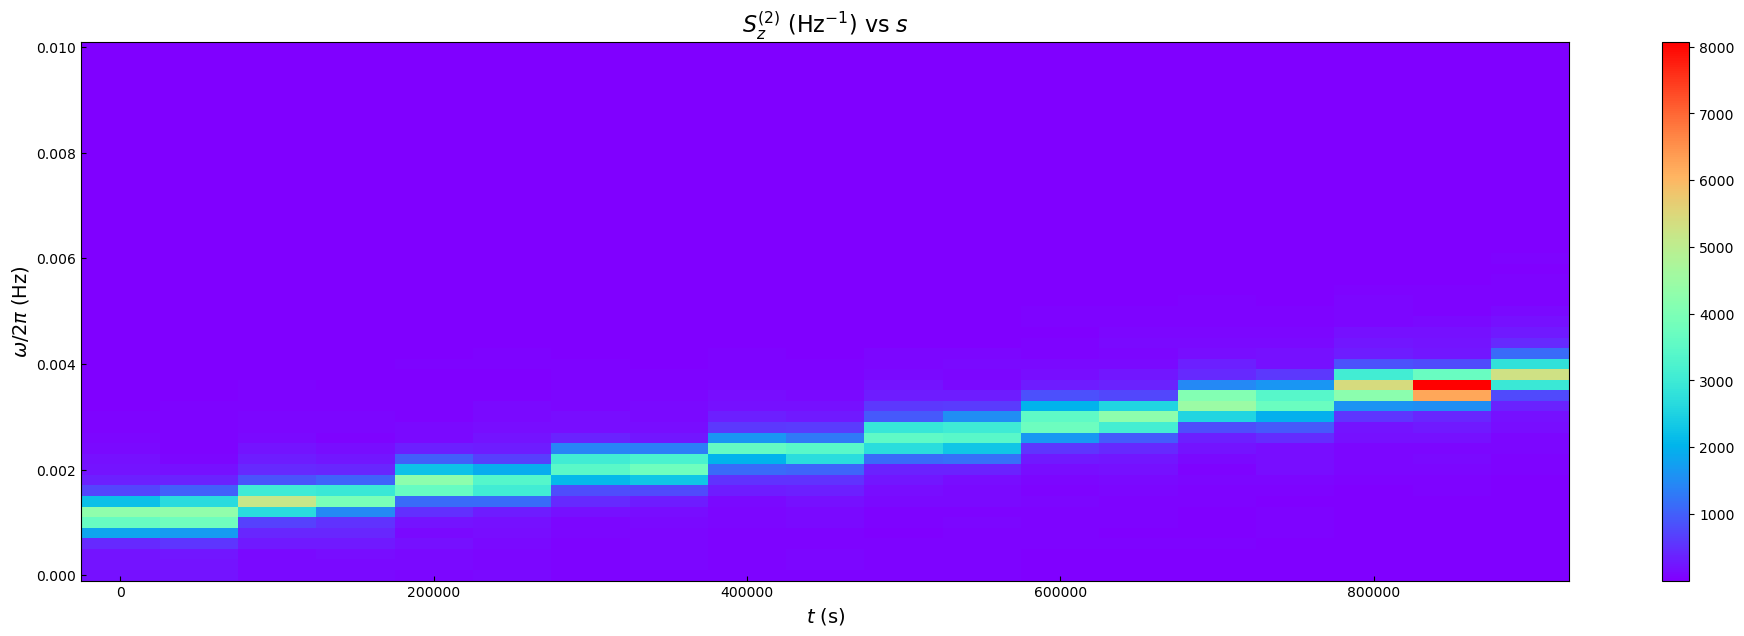

In [7]:
fig = spec.stationarity_plot()